<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** Pablo Humberto Muñoz Cuevas.

**Fecha:** 15 de octubre del 2020.

**Expediente** : 719963.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6a: Clase 13

>## <font color = 'red'> Tarea 6
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    ![imagen.png](attachment:imagen.png)

> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.

In [8]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.stats import beta,triang
from math import factorial as fac
from scipy.special import comb
import scipy.stats as st
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML

In [9]:
#ingreso mis datos
mu = 44 #media
sigma = 3 #desviación estandar
d = 47 #valor para calcular prob
#a y b son los límites inferior y superior valores optimista y pesimista
a=40
b=49 

In [10]:
Image(url= "https://i.imgur.com/agVvw1F.png")

In [12]:
Image(url= "https://i.imgur.com/YDl1RkM.png")

Alpha: 2.5185185185752905
Beta: 3.1481481481438194
Pb(T<=d)= 1.0


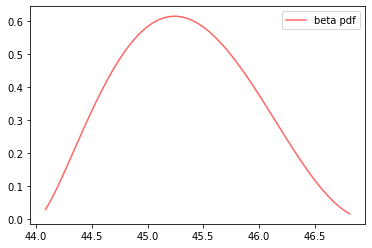

In [14]:
#función para resolver las ecuaciones
def f(z):
    alpha, beta=z
    f1 = ((a * beta + b * alpha)/(alpha + beta)) - mu
    f2 = ((alpha*beta*(b - a)**2) / (((alpha + beta)**2)*(1 + alpha + beta))) - sigma
    return [f1, f2]
#resolvemos las ecuaciones
alpha, beta = fsolve(f, [1, 1])
print(f'Alpha: {alpha}\nBeta: {beta}')
#obtenemos la distribución y probabilidad
d=66
P_beta = st.beta(alpha, beta, loc=mu, scale=sigma).cdf(d)
print('Pb(T<=d)=',P_beta)
#graficamos
fig, ax = plt.subplots(1, 1)
def plot_dist_beta(alpha,beta,mu,sigma):
    x=np.linspace(st.beta.ppf(0.001,alpha,beta,loc=mu,scale=sigma),
                 st.beta.ppf(0.999,alpha,beta,loc=mu,scale=sigma),100)
    ax.plot(x,st.beta.pdf(x,alpha,beta,loc=mu,scale=sigma),
           'r-',alpha=0.6,label='beta pdf')
    plt.legend()
    
plot_dist_beta(alpha,beta,mu,sigma)

## EJERCICIO 2

2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.

La probabilidad P(T<=d) = 91.11 %


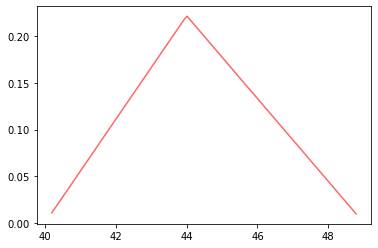

In [20]:
b=49#pesimista 
a=40#optimista 
mu=44
i=(mu-a)/(b-a)
d=47
#graficamos
fig, ax = plt.subplots(1, 1)
loc=a # Izquierda
scale=(b-a) # Derecha - Izquierda

#distribución y probabilidad
P_triang = st.triang(i, loc=loc, scale=scale).cdf(d)


x = np.linspace(st.triang.ppf(0.001, i, loc=loc, scale=scale),
                st.triang.ppf(0.999, i, loc=loc, scale=scale), 
                100)
ax.plot(x, st.triang.pdf(x, i, loc=loc, scale=scale), 
        'r-', alpha=0.6)
print('La probabilidad P(T<=d) =',P_triang.round(4)*100,'%')